<h2 style="text-align: center;">Enhancing Gold Ore Processing Efficiency with Machine Learning</h2>

### **Introdction**

In heavy industries, improving efficiency and reducing waste are essential for long-term growth and success. Gold mining, in particular, faces the challenge of extracting as much value as possible from raw materials while keeping processes efficient and cost-effective. To tackle these issues, Zyfra, a company that develops solutions for heavy industries, is turning to machine learning to improve gold ore processing.  

This project aims to use machine learning to predict how much gold can be recovered from ore during the extraction and purification processes. With accurate predictions, mining operations can make better decisions to improve production, lower costs, and avoid unprofitable practices. This approach not only increases efficiency but also helps reduce waste and use resources more effectively. 

### **Gold Purification Process**

Gold purification is a multi-stage process used to extract pure gold from ore, focusing on flotation and leaching stages.

#### 1. Flotation Process

Flotation separates gold from gangue based on surface properties. Gold becomes hydrophobic, attaching to air bubbles and floating to the surface, while gangue stays submerged.

#### Flotation Steps:
- Ore is crushed and mixed with water to form a slurry.
- Flotation chemicals are added to separate gold from gangue.
- Air bubbles cause gold to float, forming a froth, which is skimmed off as **rougher concentrate**.
- Remaining material, **rougher tails**, has a lower gold concentration and is either discarded or further treated.

#### 2. First Stage of Leaching

Cyanidation uses cyanide to dissolve gold from the concentrate into a gold-cyanide complex.

#### Cyanidation Steps:
- Flotation concentrate is mixed with sodium cyanide.
- Cyanide leaches gold into a liquid form, separating it from gangue.

#### 3. Second Stage of Leaching

Gold is recovered from the cyanide solution using activated carbon or zinc.

#### Activated Carbon Adsorption:
- Cyanide solution is passed through activated carbon, adsorbing gold.
- Gold is stripped from the carbon and refined.

#### Zinc Precipitation:
- Zinc is added to the cyanide solution, causing gold to precipitate.
- Gold is filtered out and refined.



### **Data Description**

Throughout the gold recovery process, the dataset captures a comprehensive set of measurements taken at various purification stages. These include metal concentrations (Gold, Silver, Lead), particle size distributions, process-specific parameters, and time-series measurements. Each data point is tagged with a timestamp, enabling temporal analysis to identify trends, patterns, and potential optimizations in the recovery process. This time-based dimension adds valuable context for understanding how process parameters evolve and influence recovery efficiency over time.


Each data point is tagged with a timestamp, enabling temporal analysis to identify trends, patterns, and potential optimizations in the recovery process. This time-based dimension adds valuable context for understanding how process parameters evolve and influence recovery efficiency over time.

The column names in the dataset follow the structure:

```
[stage].[parameter_type].[parameter_name]
```
Where:

- **[stage]** refers to the specific stage in the process:
  - `rougher` — flotation stage
  - `primary_cleaner` — primary purification stage
  - `secondary_cleaner` — secondary purification stage
  - `final` — final product characteristics

- **[parameter_type]** refers to the type of the parameter:
  - `input` — raw material parameters
  - `output` — product parameters
  - `state` — parameters that characterize the current state of the stage
  - `calculation` — derived or calculation-based parameters

- **[parameter_name]** refers to the specific parameter being measured. For a full description, refer to the [`parameter_names.md`](command:_github.copilot.openRelativePath?%5B%22goldrecovery%2Fdata%2Fparameter_names.md%22%5D "goldrecovery/data/parameter_names.md") file.

The following image visually represents the gold recovery process workflow, highlighting stages like flotation, primary purification, secondary purification, and final product characteristics. It also uses example variables to illustrate how data corresponds to stages and parameter types, such as gold content.

<div align="center">
<img src="https://github.com/6076paras/goldRecovery/blob/7cfb134d6b13caffe8275ae1d06b5e103509b1b7/assets/data_description.png" width="50%" height="50%" alt="Process Description" />

</div>

### ***Goals of the Project***

The main goal of this project is to use machine learning to improve the efficiency and profitability of gold mining. The project has the following key goals:

**Gold Recovery Prediction:**  
The primary objective is to create machine learning models that can accurately predict how much gold will be recovered from the ore. The focus will be on predicting two important recovery values: *rougher concentrate recovery* (rougher.output.recovery) and *final concentrate recovery* (final.output.recovery). These predictions will help improve control over the mining process.

**Optimization of Production:**  
By accurately predicting recovery rates, the project aims to improve the production process in gold mining. This involves identifying the factors that lead to better recovery and minimizing those that cause inefficiencies or waste. This will help mining operations work more effectively and efficiently.

**Elimination of Unprofitable Parameters:**  
The project will also identify and remove factors that negatively impact gold recovery. The predictive models will point out specific conditions or stages where recovery is low, allowing mining operations to make better decisions to improve recovery and reduce waste.

By achieving these goals, the project hopes to make gold extraction more efficient and cost-effective.

#### **Initialization**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

#### **Loading Data**
Loading and looking through the data... 

In [2]:
# Load Data
train_df = pd.read_csv("../data/gold_recovery_train_new.csv")
test_df = pd.read_csv("../data/gold_recovery_test_new.csv")
full_df = pd.read_csv("../data/gold_recovery_full_new.csv")

# Display basic information from training data
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print("Full set shape:", full_df.shape)
print("\nTraining Dataset Info:")
train_df.info()
print("\nFirst few rows of training data:")
display(train_df.head())
print("\nMissing values in training data:")
print(train_df.isnull().sum())
# print("\nStatistical description of training data:")
# display(train_df.describe())

Training set shape: (14149, 87)
Test set shape: (5290, 53)
Full set shape: (19439, 87)

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                          

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



Missing values in training data:
date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


Looking at the output, we can observe that the test dataset has 53 columns, while the training dataset contains 87 columns. This discrepancy arises because some parameters were measured or calculated later on. Let’s take a closer look at which columns are missing.

In [4]:
# Analyze the differences between train and test datasets
missing_cols = sorted(list(set(train_df.columns) - set(test_df.columns)))

# Categorize missing columns by their types
missing_by_stage = {
    "rougher": [],
    "primary_cleaner": [],
    "secondary_cleaner": [],
    "final": [],
}

for col in missing_cols:
    stage = col.split(".")[0]
    missing_by_stage[stage].append(col)

# Display missing columns by stage
print("\nMissing columns by processing stage:")
for stage, cols in missing_by_stage.items():
    print(f"\n{stage.upper()} stage missing columns ({len(cols)}):")
    for col in cols:
        print(f"- {col}")


Missing columns by processing stage:

ROUGHER stage missing columns (13):
- rougher.calculation.au_pb_ratio
- rougher.calculation.floatbank10_sulfate_to_au_feed
- rougher.calculation.floatbank11_sulfate_to_au_feed
- rougher.calculation.sulfate_to_au_concentrate
- rougher.output.concentrate_ag
- rougher.output.concentrate_au
- rougher.output.concentrate_pb
- rougher.output.concentrate_sol
- rougher.output.recovery
- rougher.output.tail_ag
- rougher.output.tail_au
- rougher.output.tail_pb
- rougher.output.tail_sol

PRIMARY_CLEANER stage missing columns (8):
- primary_cleaner.output.concentrate_ag
- primary_cleaner.output.concentrate_au
- primary_cleaner.output.concentrate_pb
- primary_cleaner.output.concentrate_sol
- primary_cleaner.output.tail_ag
- primary_cleaner.output.tail_au
- primary_cleaner.output.tail_pb
- primary_cleaner.output.tail_sol

SECONDARY_CLEANER stage missing columns (4):
- secondary_cleaner.output.tail_ag
- secondary_cleaner.output.tail_au
- secondary_cleaner.output.

Most of these missing columns are 'output' parameters that would not be available in a real-world prediction scenario. 

#### Missing Parameters Include:
1. Recovery rates at different stages
2. Concentrate and tail characteristics
3. Final product parameters


### **Data Quality**


missing values analysis for training dataset

found 62 features with missing values:


,missing_count,percent_missing
secondary_cleaner.output.tail_sol,1605,11.34
rougher.state.floatbank10_e_air,436,3.08
rougher.input.floatbank11_xanthate,428,3.02
primary_cleaner.output.concentrate_sol,286,2.02
secondary_cleaner.state.floatbank2_a_air,217,1.53
...,...,...
rougher.state.floatbank10_a_level,1,0.01
rougher.state.floatbank10_b_air,1,0.01
rougher.state.floatbank10_b_level,1,0.01
rougher.state.floatbank10_c_air,1,0.01



summary:
total missing values: 4,100
average missing: 0.33%
features with >50% missing: 0


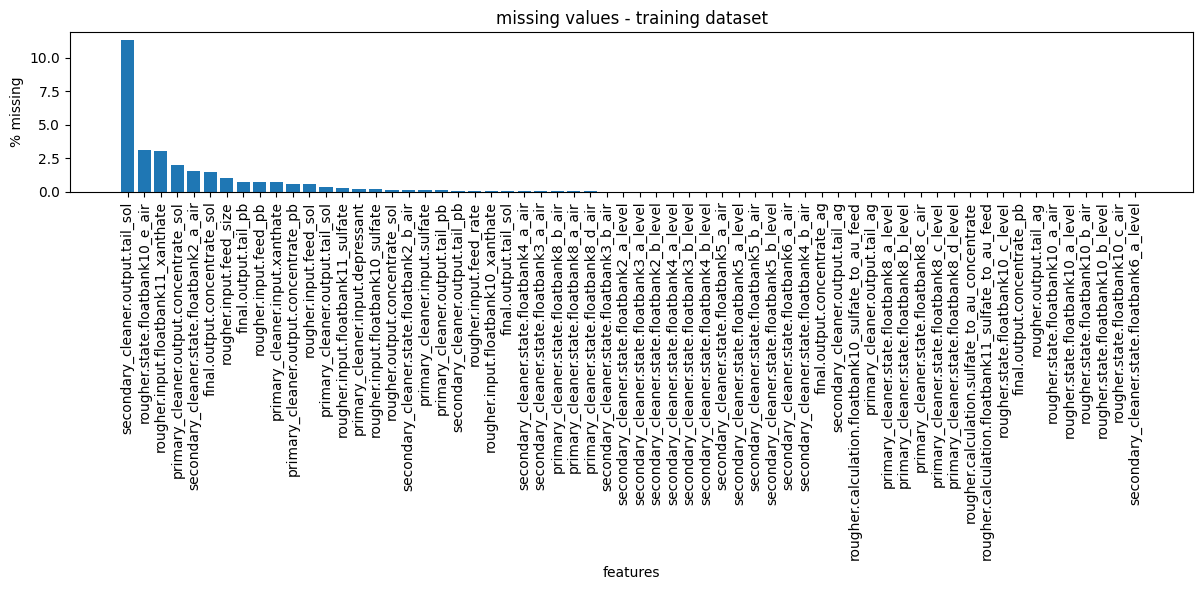


missing values analysis for testing dataset

found 12 features with missing values:


,missing_count,percent_missing
rougher.input.floatbank11_xanthate,25,0.47
rougher.input.feed_sol,21,0.40
secondary_cleaner.state.floatbank3_a_air,9,0.17
rougher.input.floatbank11_sulfate,8,0.15
primary_cleaner.input.depressant,5,0.09
rougher.input.floatbank10_sulfate,5,0.09
primary_cleaner.input.sulfate,4,0.08
primary_cleaner.input.xanthate,4,0.08
rougher.input.feed_rate,3,0.06
secondary_cleaner.state.floatbank2_a_air,3,0.06



summary:
total missing values: 90
average missing: 0.03%
features with >50% missing: 0


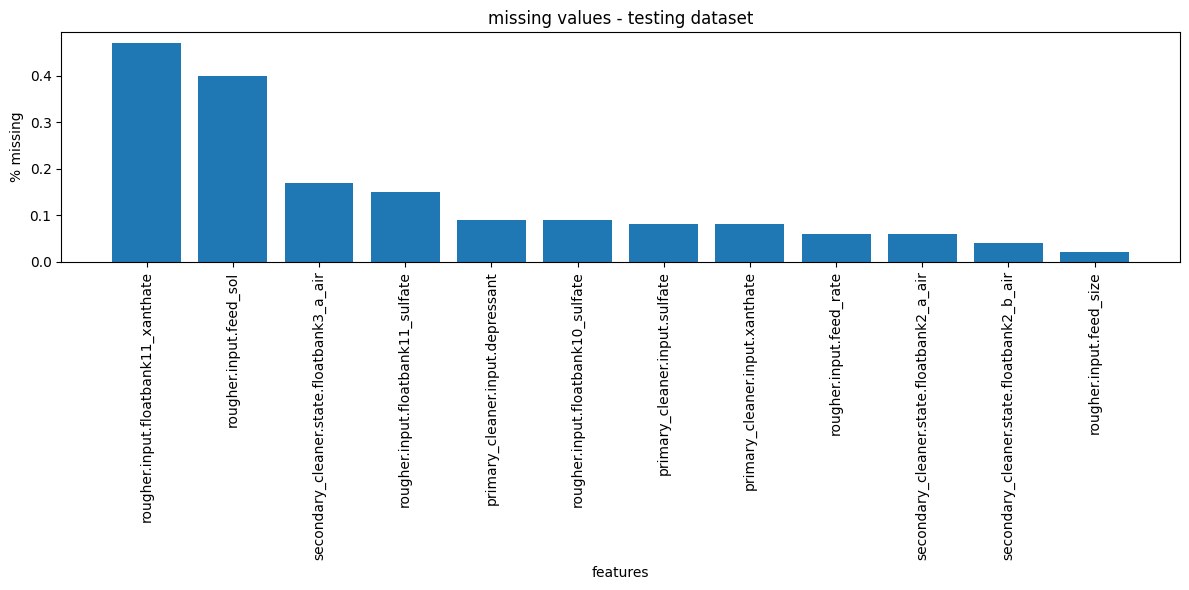


related missing values (correlation > 0.5):
final.output.concentrate_ag & final.output.concentrate_pb: 1.00
final.output.tail_pb & rougher.input.feed_pb: 0.84
primary_cleaner.input.sulfate & primary_cleaner.input.depressant: 0.51
primary_cleaner.input.sulfate & secondary_cleaner.state.floatbank2_b_air: 0.54
primary_cleaner.output.concentrate_pb & primary_cleaner.output.concentrate_sol: 0.54
primary_cleaner.state.floatbank8_a_air & primary_cleaner.state.floatbank8_b_air: 1.00
primary_cleaner.state.floatbank8_a_level & primary_cleaner.state.floatbank8_b_level: 1.00
primary_cleaner.state.floatbank8_a_level & primary_cleaner.state.floatbank8_c_air: 0.71
primary_cleaner.state.floatbank8_a_level & primary_cleaner.state.floatbank8_c_level: 1.00
primary_cleaner.state.floatbank8_a_level & primary_cleaner.state.floatbank8_d_air: 0.58
primary_cleaner.state.floatbank8_a_level & primary_cleaner.state.floatbank8_d_level: 1.00
primary_cleaner.state.floatbank8_a_level & rougher.calculation.sulfate_to

In [7]:
def analyze_missing_values(df, name):
    """analyze missing values and their patterns in the dataset"""
    print(f"\n{'='*50}")
    print(f"missing values analysis for {name} dataset")
    print(f"{'='*50}")

    # get basic missing value stats
    missing_vals = df.isnull().sum()
    missing_pct = (missing_vals / len(df)) * 100

    # create summary dataframe
    missing_info = pd.DataFrame(
        {"missing_count": missing_vals, "percent_missing": missing_pct.round(2)}
    )

    # look at features with missing values
    missing_features = missing_info[missing_info["missing_count"] > 0].sort_values(
        "percent_missing", ascending=False
    )

    if len(missing_features) > 0:
        print(f"\nfound {len(missing_features)} features with missing values:")
        display(missing_features)

        # quick summary stats
        print("\nsummary:")
        print(f"total missing values: {missing_vals.sum():,}")
        print(f"average missing: {missing_pct.mean():.2f}%")
        print(
            f"features with >50% missing: {len(missing_features[missing_features['percent_missing'] > 50])}"
        )

        # visualize missing value distribution
        plt.figure(figsize=(12, 6))
        plt.bar(range(len(missing_features)), missing_features["percent_missing"])
        plt.title(f"missing values - {name} dataset")
        plt.xlabel("features")
        plt.ylabel("% missing")
        plt.xticks(range(len(missing_features)), missing_features.index, rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print("\nno missing values found in the dataset")


# check both datasets
analyze_missing_values(train_df, "training")
analyze_missing_values(test_df, "testing")


def check_missing_patterns(df):
    """look for patterns in how values are missing"""
    # find features with any missing values
    missing_cols = df.columns[df.isnull().any()].tolist()

    if missing_cols:
        # check if missing values are related
        missing_corr = df[missing_cols].isnull().corr()

        print("\nrelated missing values (correlation > 0.5):")
        for i in range(len(missing_cols)):
            for j in range(i + 1, len(missing_cols)):
                corr = missing_corr.iloc[i, j]
                if abs(corr) > 0.5:
                    print(f"{missing_cols[i]} & {missing_cols[j]}: {corr:.2f}")

        # look for common patterns
        print("\nmissing value patterns:")
        patterns = df[missing_cols].isnull().sum(axis=1).value_counts()
        print(patterns)
    else:
        print("no missing values found")


# check patterns in training data
check_missing_patterns(train_df)

#### Handling Missing Values

Now that we have analyzed the missing values in our dataset, let's address how to handle them. Since our data is time-series based with timestamps, we can make a reasonable assumption that parameter values don't change drastically between consecutive measurements. This temporal continuity suggests we can use forward fill imputation for missing values.

However, we need to be cautious with this approach:
- We should only impute missing values in our feature columns (X variables)
- Target variables (y values) should not be imputed as they are what our machine learning models will predict
- The imputation should be done separately for training and test sets to prevent data leakage

Let's implement this strategy: